In [1]:
from google.colab import drive

drive.mount('/content/drive')

!cp /content/drive/MyDrive/Abdulla_OCR/Character/anotation_28x28/Test.csv .
!cp /content/drive/MyDrive/Abdulla_OCR/Character/anotation_28x28/Train.csv .

!rm -rf sample_data

Mounted at /content/drive


In [2]:
# Disable warning
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
FAST_RUN=False
batch_size=32
epochs=100
if FAST_RUN:
    epochs=1

In [4]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [5]:
print(train_data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


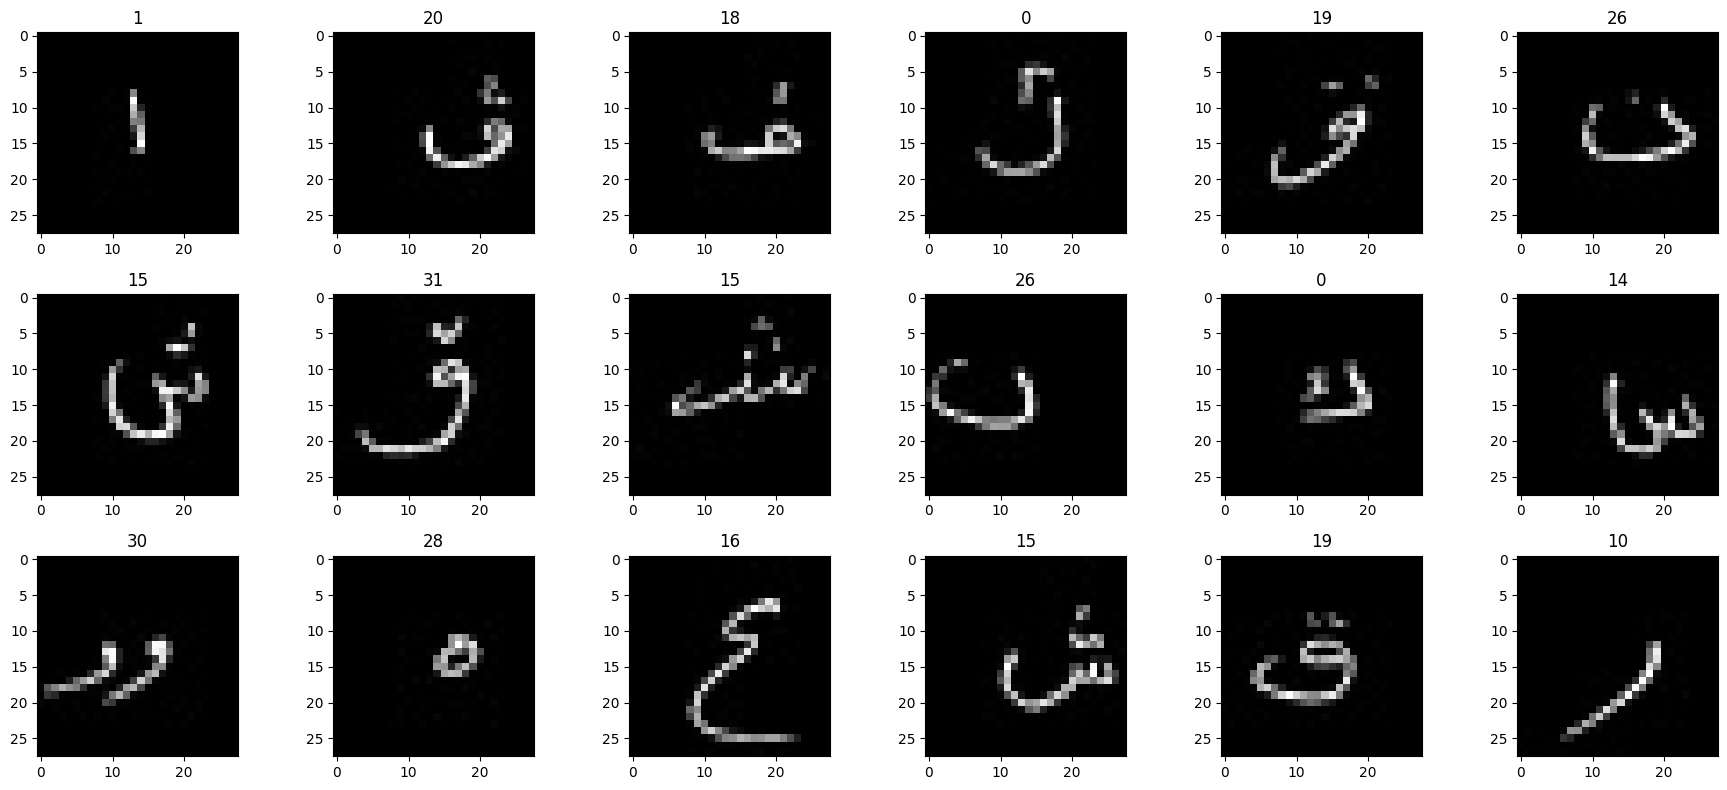

In [6]:
def show_image(train_image, label, index):
    image_shaped = train_image.values.reshape(28,28)
    plt.subplot(3, 6, index+1)
    plt.imshow(image_shaped, cmap=plt.cm.gray)
    plt.title(label)


plt.figure(figsize=(18, 8))
sample_image = train_data.sample(18).reset_index(drop=True)
for index, row in sample_image.iterrows():
    label = row['label']
    image_pixels = row.drop('label')
    show_image(image_pixels, label, index)
plt.tight_layout()

In [7]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x = train_data.drop(columns=['label']).values.reshape(train_data.shape[0],28,28,1)
y = to_categorical(train_data['label'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_datagen.fit(x_train)
train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
train_datagen.fit(x_test)
validation_generator = validation_datagen.flow(
    x_test,
    y_test
    
)

In [9]:
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout

model = keras.Sequential([

keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28,28,1)),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, kernel_size = 3, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.4),

keras.layers.Conv2D(64, kernel_size = 3, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(64, kernel_size = 3, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.4),

keras.layers.Flatten(),
keras.layers.Dropout(0.4),
keras.layers.Dense(35, activation='softmax')

])

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 batch_normalization_1 (Batc  (None, 6, 6, 32)         1

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x=x_train,y=y_train, epochs=30)

Epoch 1/30
5906/5906 [==============================] - 62s 8ms/step - loss: 0.9841 - accuracy: 0.7060
Epoch 2/30
5906/5906 [==============================] - 46s 8ms/step - loss: 0.3608 - accuracy: 0.8936
Epoch 3/30
5906/5906 [==============================] - 46s 8ms/step - loss: 0.2780 - accuracy: 0.9203
Epoch 4/30
5906/5906 [==============================] - 45s 8ms/step - loss: 0.2379 - accuracy: 0.9331
Epoch 5/30
5906/5906 [==============================] - 45s 8ms/step - loss: 0.2158 - accuracy: 0.9394
Epoch 6/30
5906/5906 [==============================] - 45s 8ms/step - loss: 0.1979 - accuracy: 0.9449
Epoch 7/30
5906/5906 [==============================] - 46s 8ms/step - loss: 0.1871 - accuracy: 0.9482
Epoch 8/30
5906/5906 [==============================] - 45s 8ms/step - loss: 0.1762 - accuracy: 0.9512
Epoch 9/30
5906/5906 [==============================] - 45s 8ms/step - loss: 0.1701 - accuracy: 0.9534
Epoch 10/30
5906/5906 [==============================] - 45s 8ms/step - l

In [12]:
model.evaluate(x_test, y_test)

657/657 [==============================] - 3s 4ms/step - loss: 0.0717 - accuracy: 0.9808


[0.07167855650186539, 0.9807591438293457]

In [13]:
model.evaluate(x_train, y_train)

5906/5906 [==============================] - 21s 4ms/step - loss: 0.0331 - accuracy: 0.9905


[0.03305622562766075, 0.9905222654342651]

In [14]:
model.save("model.h5")